Here we look at some data from Wine Reviews

https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
%matplotlib inline

We load our Wine Reviews csv file:

In [2]:
wineReviews = pd.read_csv("http://knuth.luther.edu/~doroel01/winemag-data-130k-v2.csv", index_col=0)

## Let's take a first look on our data

In [3]:
wineReviews.info() # let's see data format, size, shape and if we have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


We have 129970 rows and 14 columns. 

## Null values

In [4]:
# Function to investigate missing values in wine dataset :
def MissingValues(df): #creating the function
    total = df.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print(df[~(df['Total'] == 0)])# Returning values of nulls different of 0
    
    return

MissingValues(wineReviews)

                       Total    Percent
region_2               79460  61.136715
designation            37465  28.825661
taster_twitter_handle  31213  24.015357
taster_name            26244  20.192197
region_1               21247  16.347493
price                   8996   6.921544
province                  63   0.048472
country                   63   0.048472
variety                    1   0.000769


Based on the heatmap, we have 4 variables with the a relative high (20%+) number of nulls

## Visualize the null values using our heatmap:

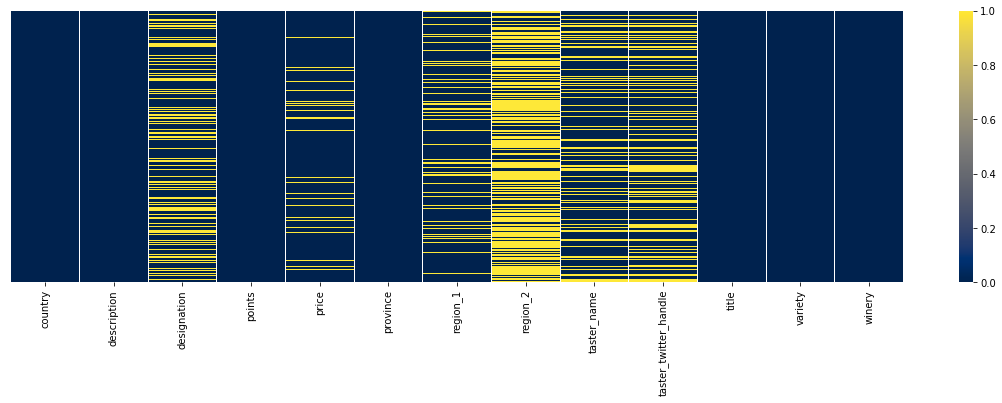

In [5]:
f = plt.figure(figsize=(20,5))
sns.heatmap(wineReviews.isnull(),yticklabels=False,cmap='cividis')
plt.show()

The heatmap shows that 6 columns in the dataset have variables with more than 6% number of nulls

## Unique values

In [6]:
wineReviews.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

# Investigating distribuition of Points and Prices

In [7]:
print("Statistics of numerical data: ")
print(wineReviews.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


We see very interesting distribuition of Points and Price.

1. The values of points are distributed between 80 and 100
2. The price have a high difference between the values and a high standard deviation

## Lets see some graphs of this distribuitions

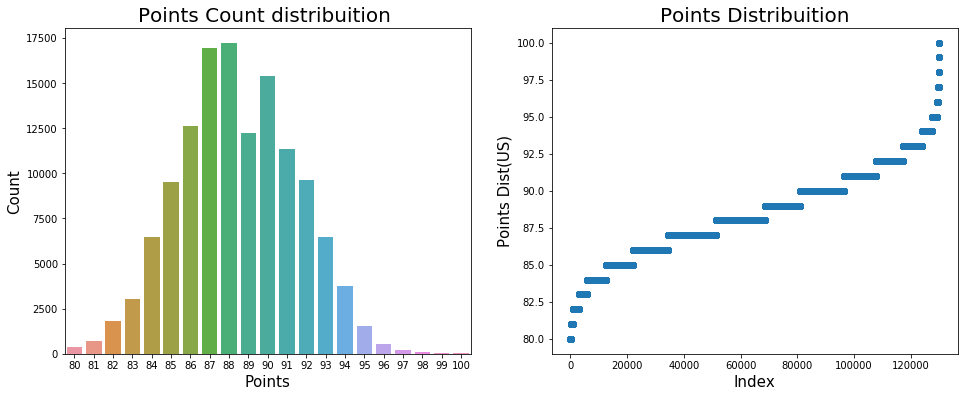

Percentiles of points: 
0.01    82.0
0.25    86.0
0.50    88.0
0.75    91.0
0.99    95.0
Name: points, dtype: float64


In [8]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1) # this creates a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=wineReviews) # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(wineReviews.shape[0]), np.sort(wineReviews.points.values)) # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

print("Percentiles of points: ") 
print(wineReviews['points'].quantile([.01,.25,.5,.75,.99])) # printing the quantile values

The histogram and the Quantile plots both show a normal distribution of points

## Now we investigate the distribution of price values

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


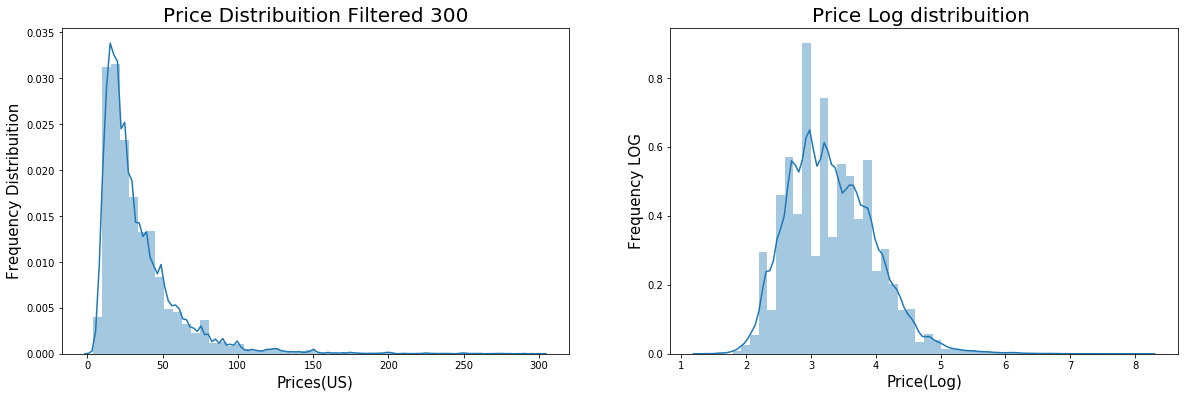

In [9]:
plt.figure(figsize=(20,6))

g = plt.subplot(121)
g = sns.distplot(wineReviews[wineReviews['price'] < 300]['price'])
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)

g1 = plt.subplot(122)
g1 = sns.distplot(np.log(wineReviews['price'].dropna()))
g1.set_title("Price Log distribuition ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.show()

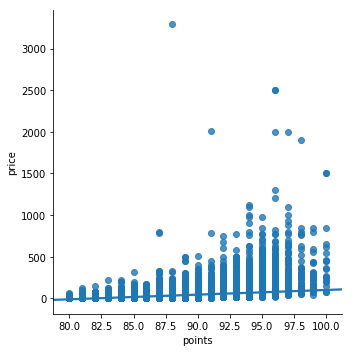

In [10]:
sns.lmplot(y = 'price', x='points', data=wineReviews)
plt.show()

In [11]:
wineReviews.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


Scatter plot interpretation:

1. The highest values isn't of the wine with highest points
2. The most expensive wine have points between 87 and 90

## Let's take a quick look at all wines with price highest than USD 2000

In [12]:
wineReviews.loc[(wineReviews['price'] > 1500)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


We have just 7 wines with values highest than 1500 USD. Moreover, It's interesting to note that the most expensive wine has the lowest points among all the 7 wines and that the almost all of them are from France.

## We check whether or not there are any duplicates in our dataset:

In [13]:
wineReviews[wineReviews.duplicated('description',keep=False)].sort_values('description').head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


We decided to drop all duplicates based on the description column alone and subsequently all missing price data, we then check the size of our dataset again:

In [14]:
wineReviews = wineReviews.drop_duplicates('description')
wineReviews = wineReviews[pd.notnull(wineReviews.price)]
wineReviews.shape

(111567, 13)

# Country Exploration

Plotting all the countries, there's some odd plots as a result of low sample size for certain countries.

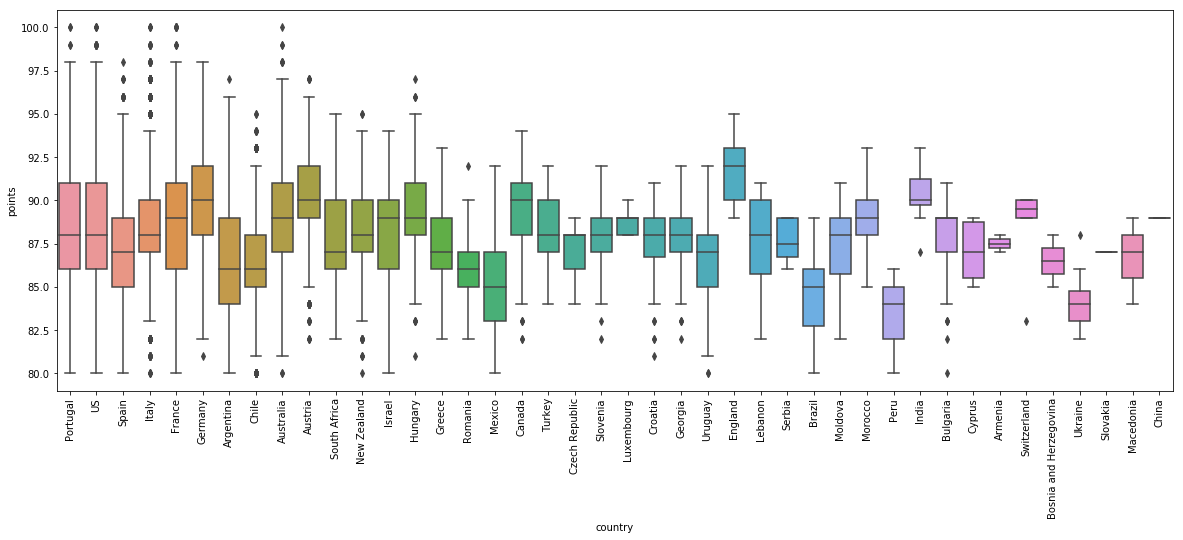

In [15]:
fig1, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=wineReviews, ax = ax)
plt.xticks(rotation = 90)
plt.show()

As seen, countries like Slovakia, China, Armenia, and Switzerland have extremely low samples in our dataset

Next, we remove all countries with less than 100 observations

In [16]:
wineBycountry = wineReviews.country.value_counts()[:18]

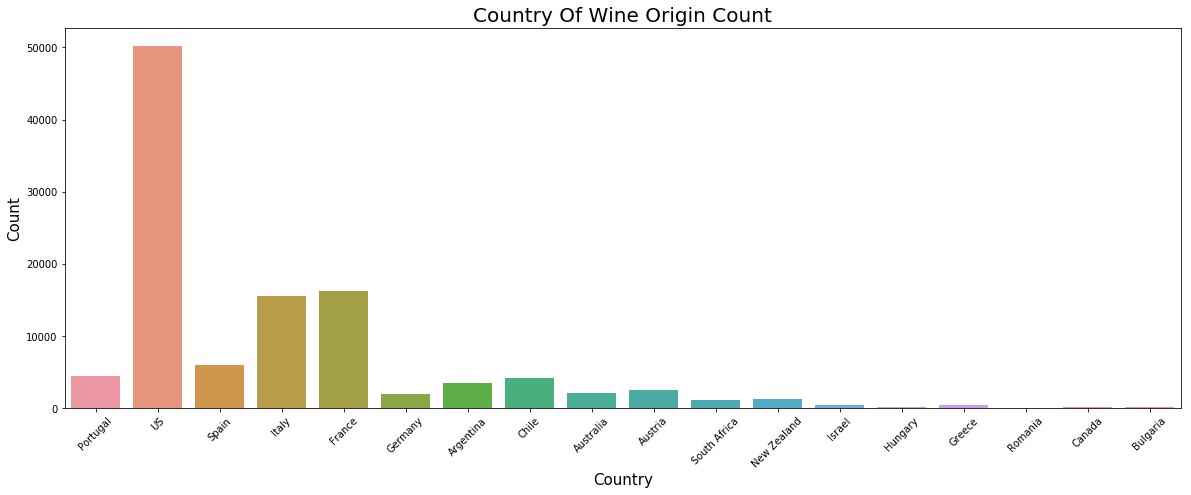

In [17]:
fig2, ax = plt.subplots(figsize = (20,7))

g = sns.countplot(x='country', data=wineReviews[wineReviews.country.isin(wineBycountry.index.values)])
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

As seen in the bar chart above, US has the highest sample among all the countries following by Frace, Italy, Spain, Portugal, and so on.

Next, we plot the median scores (points) of each country side by side:

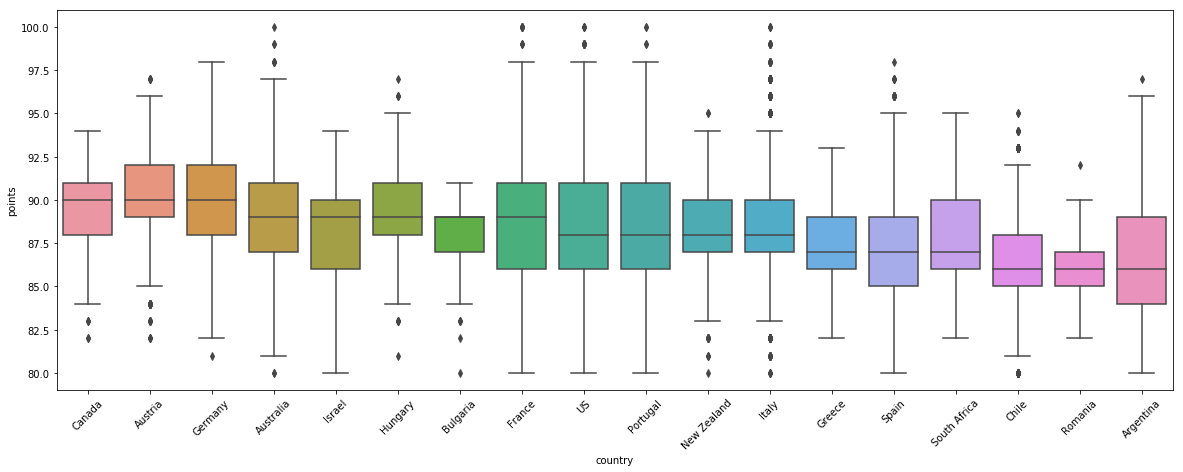

In [18]:
countryPoints = wineReviews.groupby('country').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['points'] for col,vals in countryPoints.groupby('country')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig3, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=countryPoints, order=meds.index, ax = ax)
plt.xticks(rotation = 45)

plt.show()

After removing all countries with less than 100 observations, it appears that Canada, Austria, and Germany have the highest median scores (points). However, the distribution overall appears to be fairly uniform.

We then proceed to visualize the wine prices sorted by median (highest to lowest):

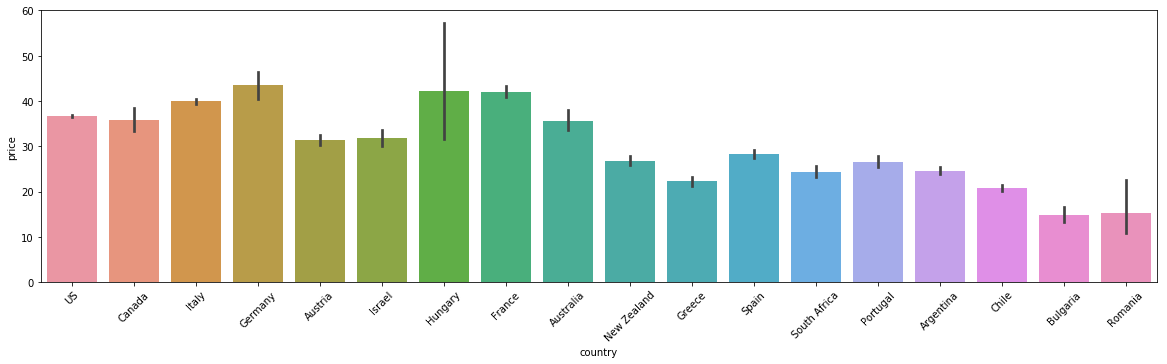

In [19]:
AveWinePriceByCountry = pd.DataFrame({col:vals['price'] for col,vals in countryPoints.groupby('country')})
meds2 = AveWinePriceByCountry.median()
meds2.sort_values(ascending=False, inplace=True)

fig4, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='country',y='price', data=countryPoints, order=meds2.index, ax = ax)
plt.xticks(rotation = 45)
plt.show()

Here are the medians for the above barplot:

In [20]:
print(meds2)

US              30.0
Canada          30.0
Italy           28.0
Germany         27.0
Austria         25.0
Israel          25.0
Hungary         25.0
France          25.0
Australia       21.0
New Zealand     20.0
Greece          19.0
Spain           18.0
South Africa    18.0
Portugal        17.0
Argentina       17.0
Chile           15.0
Bulgaria        14.0
Romania          9.0
dtype: float64


# Province Exploration

We want to show all provinces that have more than 1000 observations

In [21]:
provinces = wineReviews['province'].value_counts()[:23]
provinces

California            33520
Washington             7911
Oregon                 4917
Tuscany                4686
Bordeaux               3692
Northern Spain         3503
Mendoza Province       3000
Burgundy               2872
Piedmont               2828
New York               2443
Veneto                 2125
Alsace                 1945
Northeastern Italy     1826
Loire Valley           1454
Sicily & Sardinia      1421
Champagne              1284
South Australia        1256
Southwest France       1225
Southern Italy         1050
Douro                  1045
Catalonia              1044
Provence               1017
Central Italy          1012
Name: province, dtype: int64

## Plotting Provinces against the total count of observations

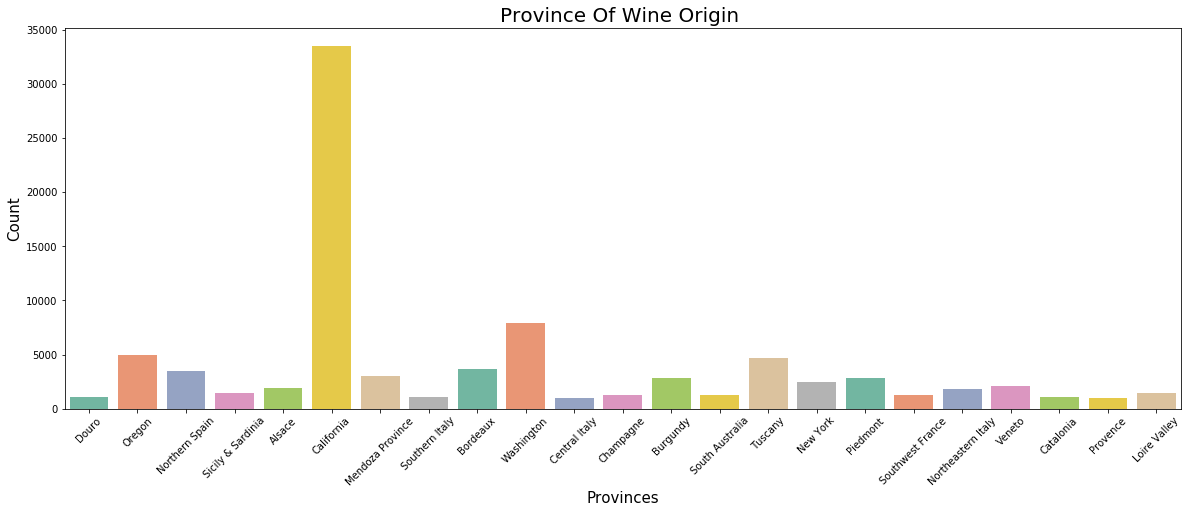

In [22]:
fig2, ax = plt.subplots(figsize = (20,7))
g = sns.countplot(x='province', 
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

Based on the bar chart above, California is the province with the highest observation in our dataset

# Plotting Provinces against the price of wines

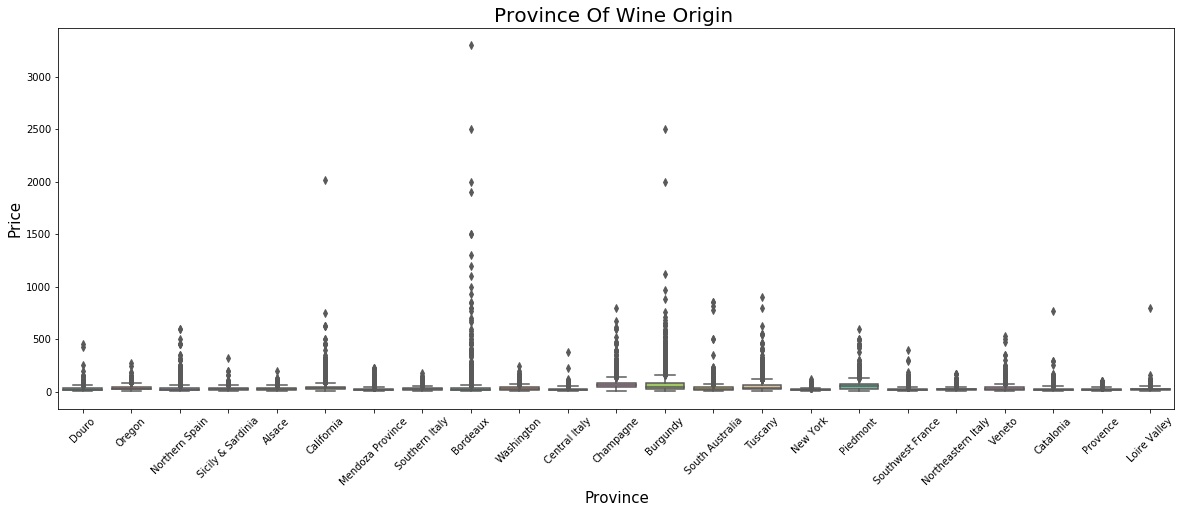

In [23]:
fig2, ax = plt.subplots(figsize = (20,7))
g1 = sns.boxplot(y='price', x='province',
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## Boxplot of Provinces vs. Points 

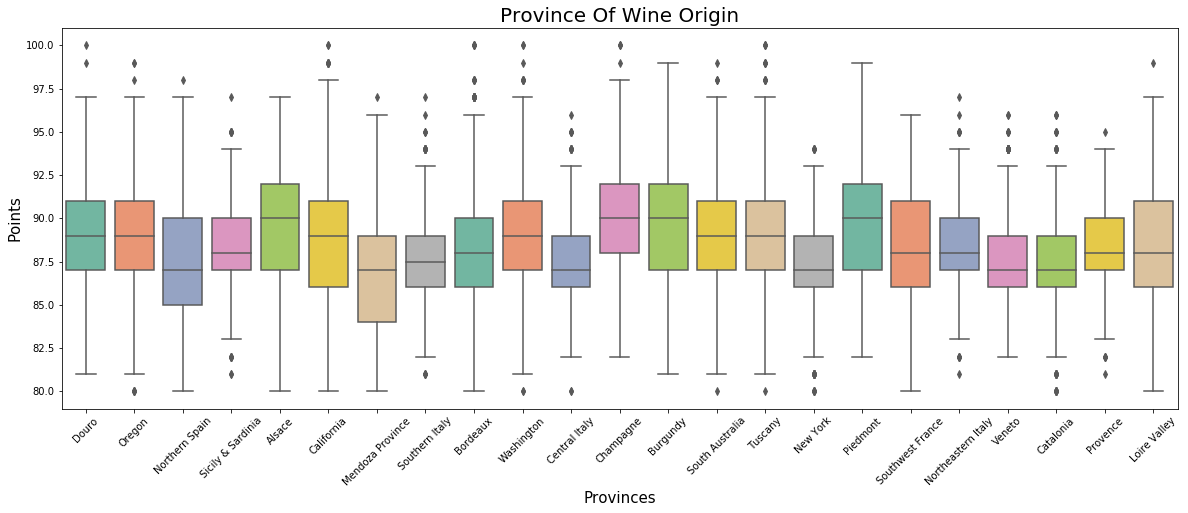

In [24]:
fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='province',
                  data=wineReviews.loc[(wineReviews.province.isin(provinces.index.values))],
                 palette='Set2')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

# Wine Variety Exploration

There's a large variety of wines in the dataset. However, we found that there's an exponential decline in the number of observations for each wine type:

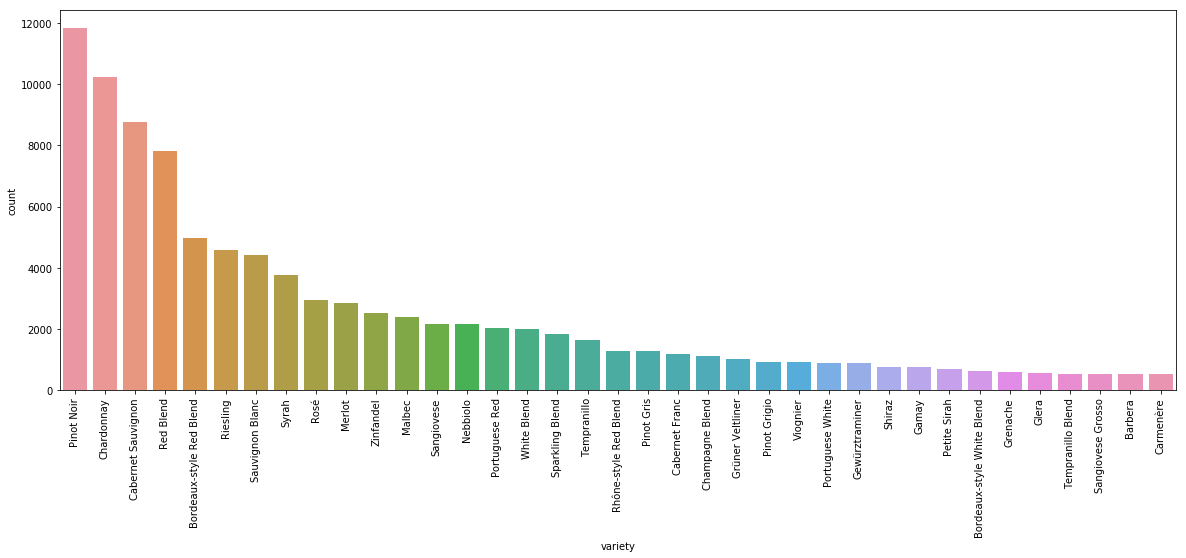

In [25]:
wineReviewsVar = wineReviews.groupby('variety').filter(lambda x: len(x) >500)
list = wineReviewsVar.variety.value_counts().index.tolist()
fig5, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=wineReviewsVar, order = list, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

Below is a boxplot chart containing all wine varieties (>200 observations) and their respective point distributions. Sangiovese Grosso appears to have the highest median score of all wines. Despite the variations, overall the point distibution is basically uniform.

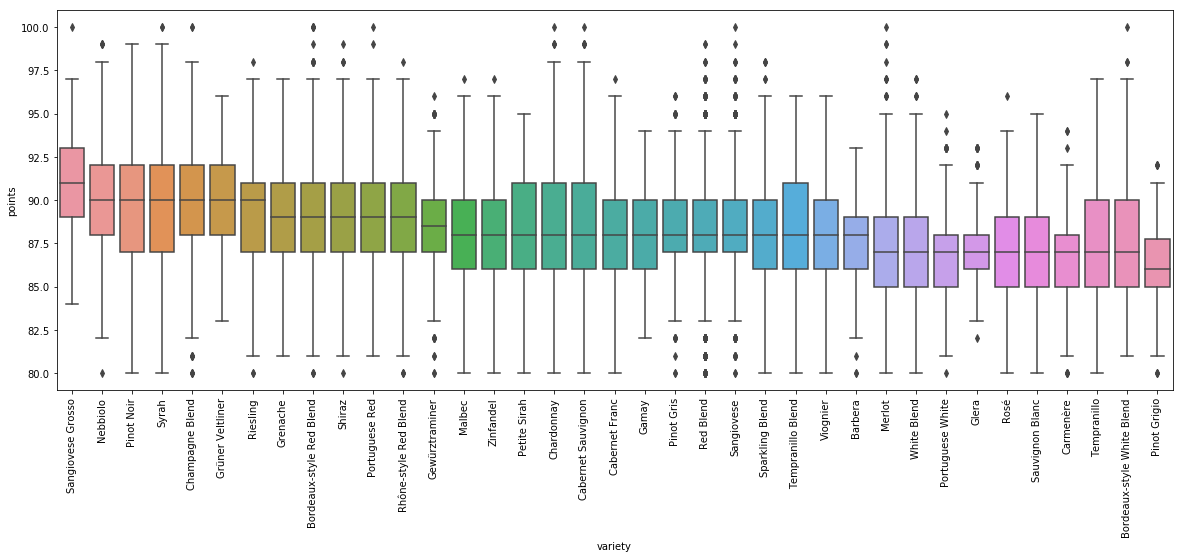

In [26]:
df4 = pd.DataFrame({col:vals['points'] for col,vals in wineReviewsVar.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig6, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=wineReviewsVar, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

However, there's clear variation when we look at the price of the wine variety:

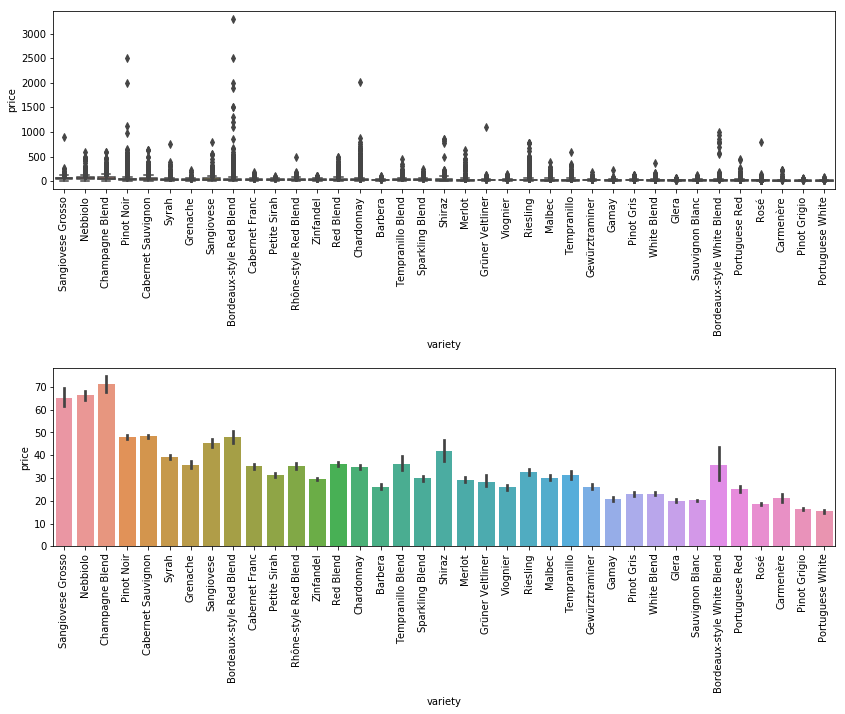

In [27]:
plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
df5 = pd.DataFrame({col:vals['price'] for col,vals in wineReviewsVar.groupby('variety')})
meds4 = df5.median()
meds4.sort_values(ascending=False, inplace=True)

chart = sns.boxplot(x='variety',y='price', data=wineReviewsVar, order=meds4.index)
plt.xticks(rotation = 90)

plt.subplot(3,1,2)
chart1 = sns.barplot(x='variety',y='price', data=wineReviewsVar, order=meds4.index)
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace = 1.0,top = 0.9)

plt.show()

# Taster Names Exploration

## Plotting Taster Names against the Total count

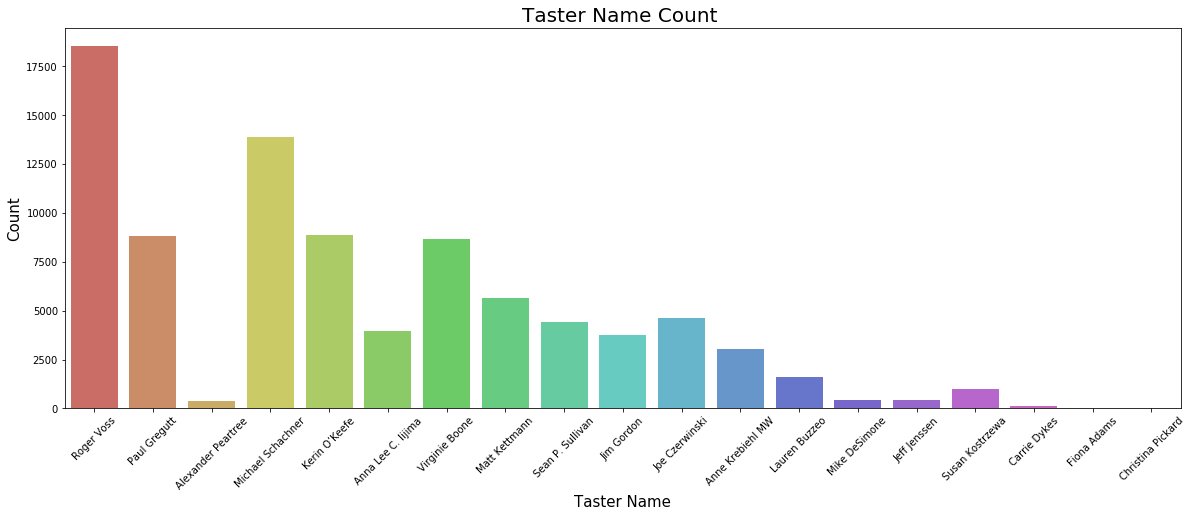

In [28]:
fig2, ax = plt.subplots(figsize = (20,7))
g = sns.countplot(x='taster_name', data=wineReviews, palette='hls')
g.set_title("Taster Name Count ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## Plotting Taster Names against Wine Prices

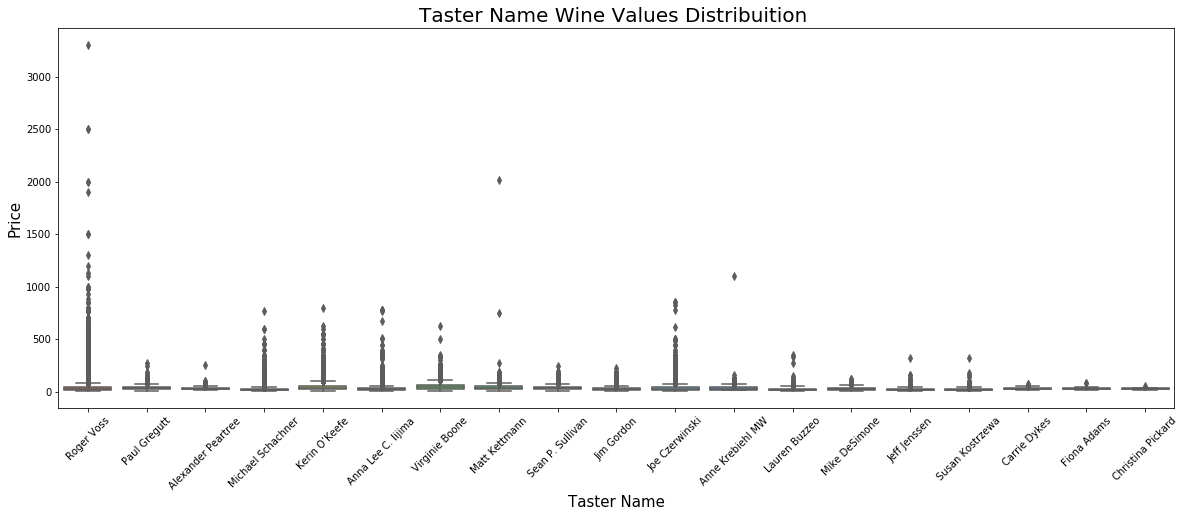

In [29]:
fig2, ax = plt.subplots(figsize = (20,7))
g1 = sns.boxplot(y='price', x='taster_name', data=wineReviews,
                 palette='hls')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Taster Names against Wine Prices

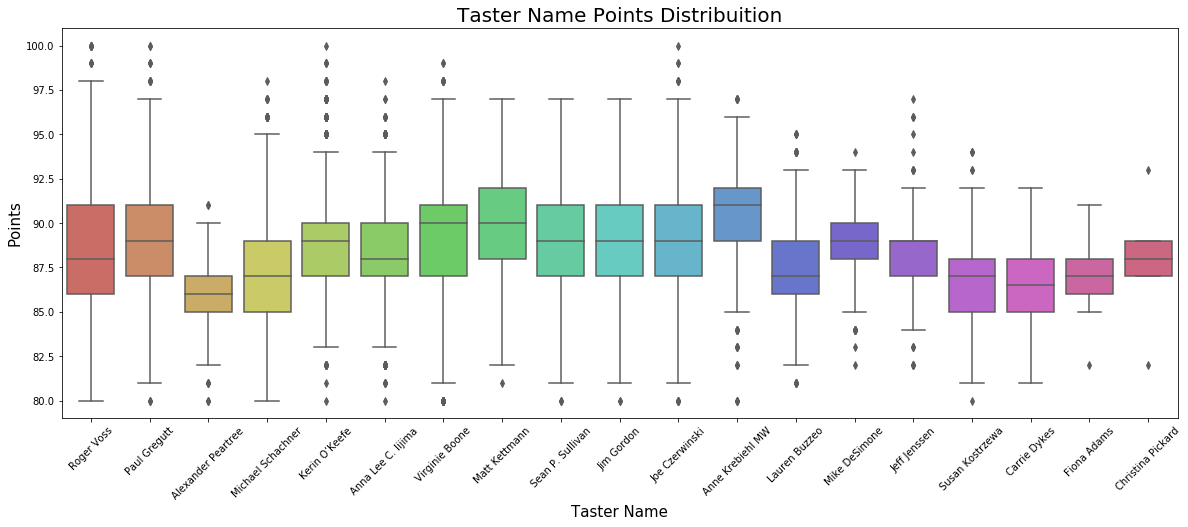

In [30]:
fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='taster_name',
                  data=wineReviews, palette='hls')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# Winery Distribution

We find the top 20 Winery based on their total observations

In [31]:
winery = wineReviews.winery.value_counts()[:20]
winery 

Williams Selyem          204
Testarossa               200
Wines & Winemakers       199
DFJ Vinhos               194
Chateau Ste. Michelle    169
Louis Latour             166
Concha y Toro            152
Columbia Crest           145
Kendall-Jackson          119
Gary Farrell             118
Siduri                   113
Lynmar                   113
Georges Duboeuf          112
Santa Ema                108
Trapiche                 107
Montes                   106
Robert Mondavi           106
Undurraga                104
Foxen                     99
V. Sattui                 98
Name: winery, dtype: int64

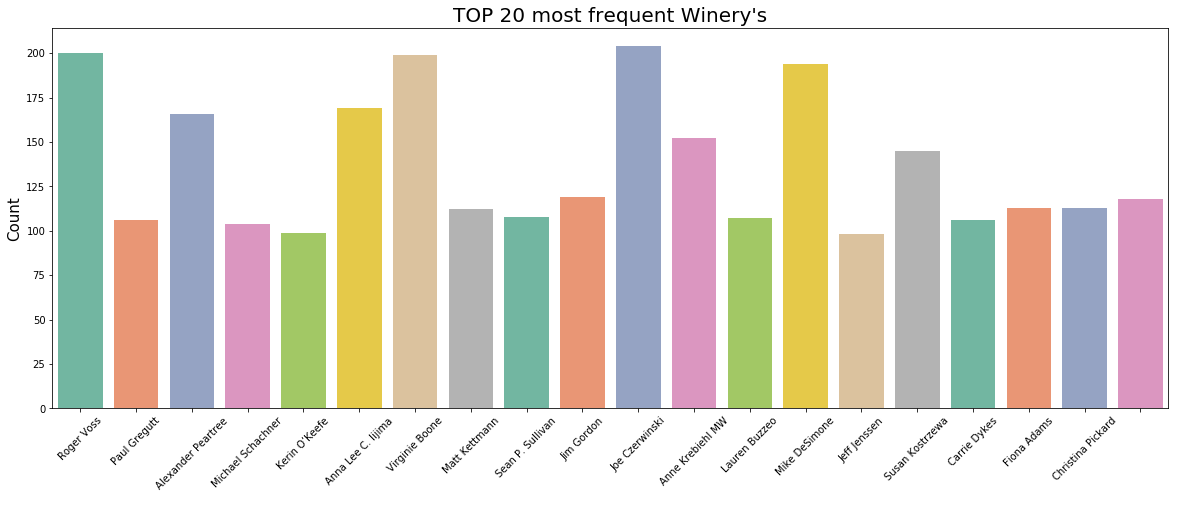

In [32]:
fig2, ax = plt.subplots(figsize = (20,7))
wineplot= sns.countplot(x='winery', 
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
wineplot.set_title("TOP 20 most frequent Winery's", fontsize=20)
wineplot.set_xlabel(" ", fontsize=15)
wineplot.set_ylabel("Count", fontsize=15)
wineplot.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Price by Wineries

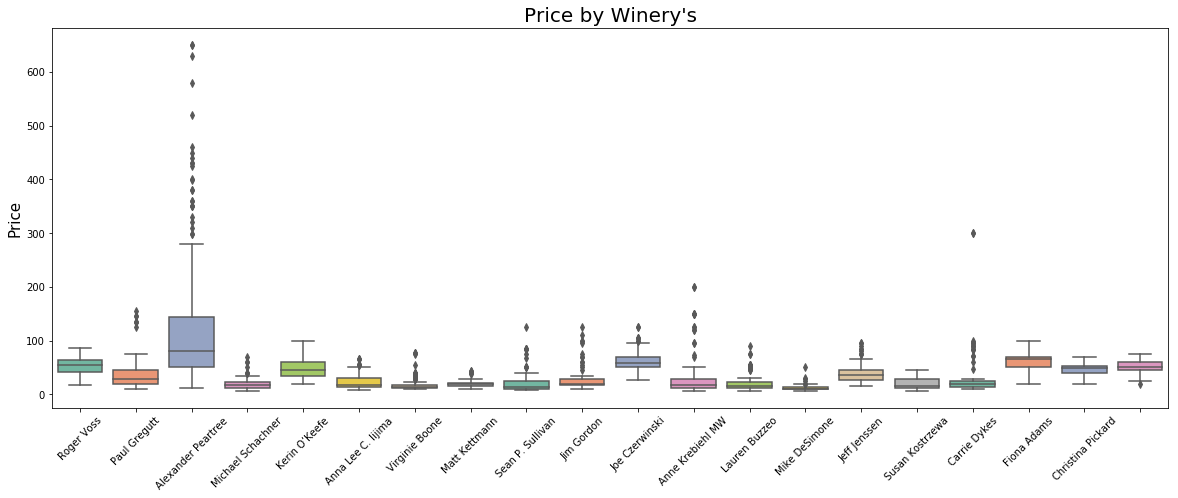

In [33]:
fig12, ax = plt.subplots(figsize = (20,7))
priceByWinery = sns.boxplot(y='price', x='winery',
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
priceByWinery.set_title("Price by Winery's", fontsize=20)
priceByWinery.set_xlabel("", fontsize=15)
priceByWinery.set_ylabel("Price", fontsize=15)
priceByWinery.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

## BoxPlotting Price by Wineries

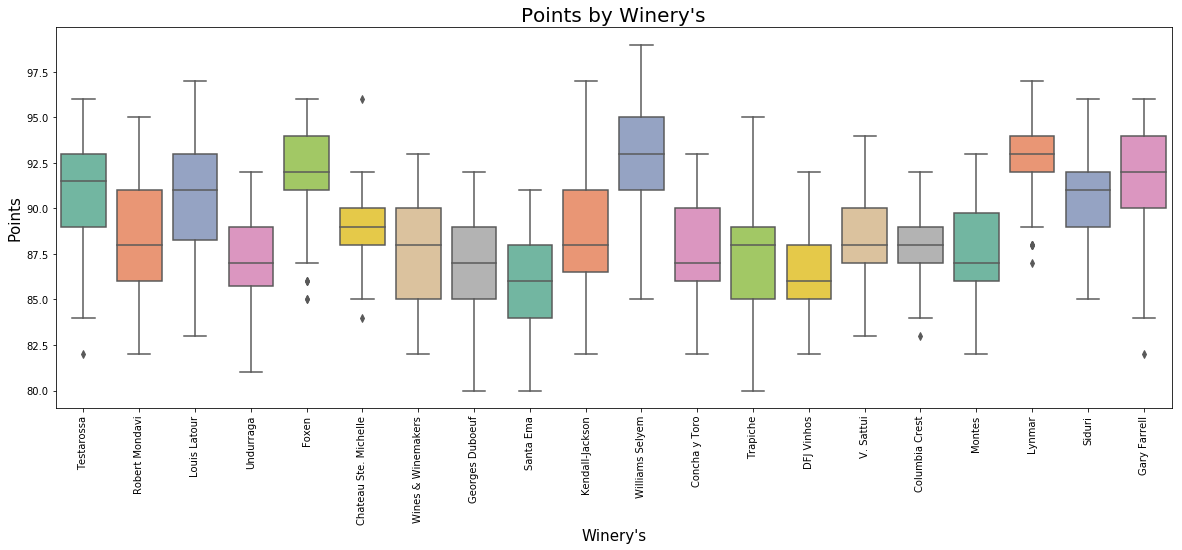

In [34]:
fig12, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='winery',
                  data=wineReviews.loc[(wineReviews.winery.isin(winery.index.values))],
                 palette='Set2')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
plt.show()

# Can we Analyse the Description? Let's find out...

## Does Description Length Affect the Wine Score (Points)? 

We create a box plot for description length vs. the points given to see whether or not descriptions correlate with the scores:

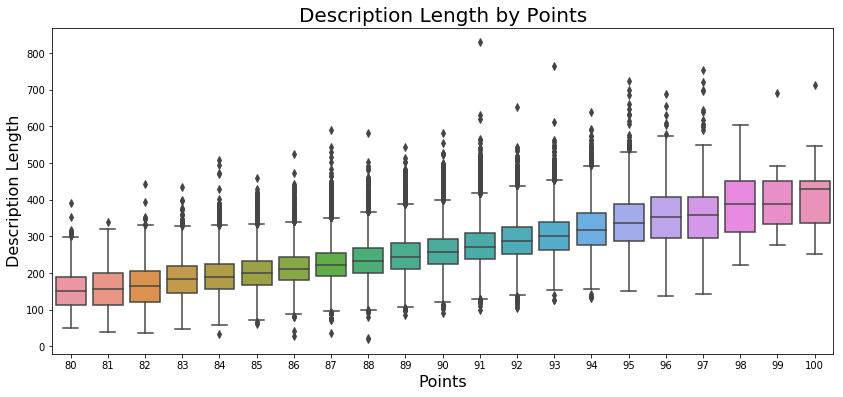

In [35]:
wineReviewsDesc = wineReviews.assign(desc_length = wineReviews['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=wineReviewsDesc )
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

To our surprise, it turns out that high scores given by the wine taters have to do with the length of description provided. The median of the description length seem to increase with the increase of points of score. This suggests that the more information provided in the description of wine, the more information the tasters get, thus may lead to the causation of the high scores. 

## Who are the sommeliers with biggest descriptions length?!

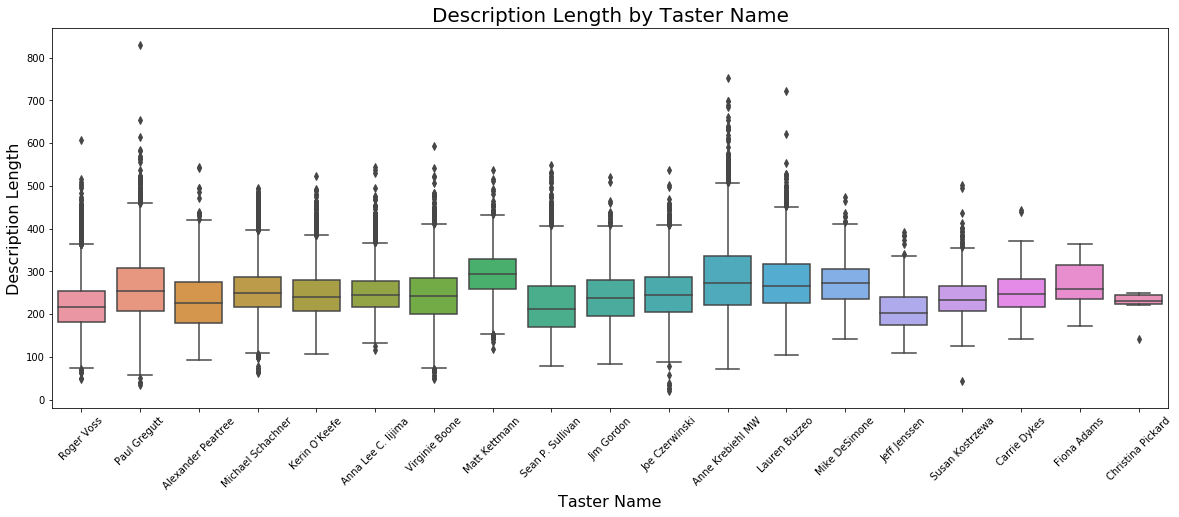

In [36]:
plt.figure(figsize=(20,7))

g = sns.boxplot(x='taster_name', y='desc_length', data=wineReviewsDesc)
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## Scatter plot of the description length and the price

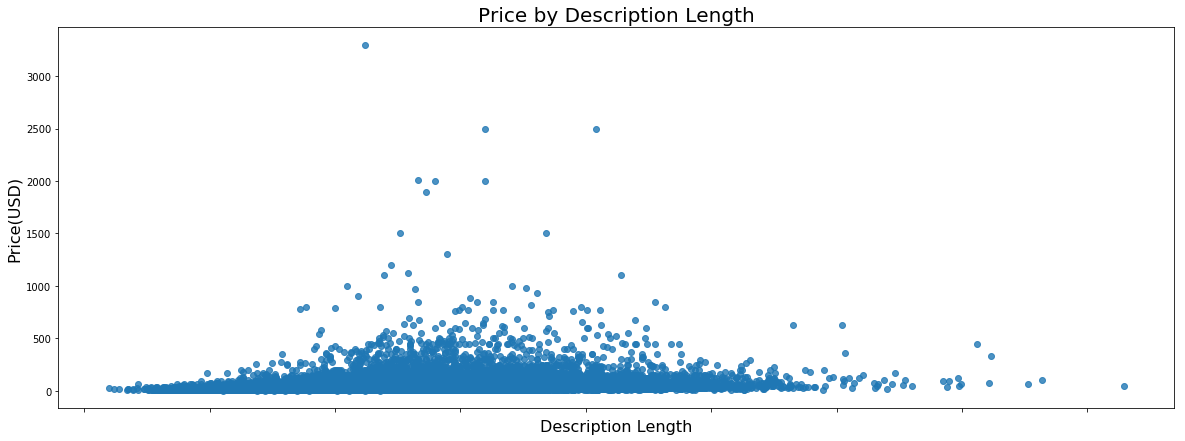

In [37]:
plt.figure(figsize=(20,7))

g = sns.regplot(x='desc_length', y='price',
                data=wineReviewsDesc, fit_reg=False)
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [38]:
wineReviewsDesc.corr()

,points,price,desc_length
points,1.000000,0.416566,0.580430
price,0.416566,1.000000,0.252126
desc_length,0.580430,0.252126,1.000000


# Wordcloud of Wine Titles

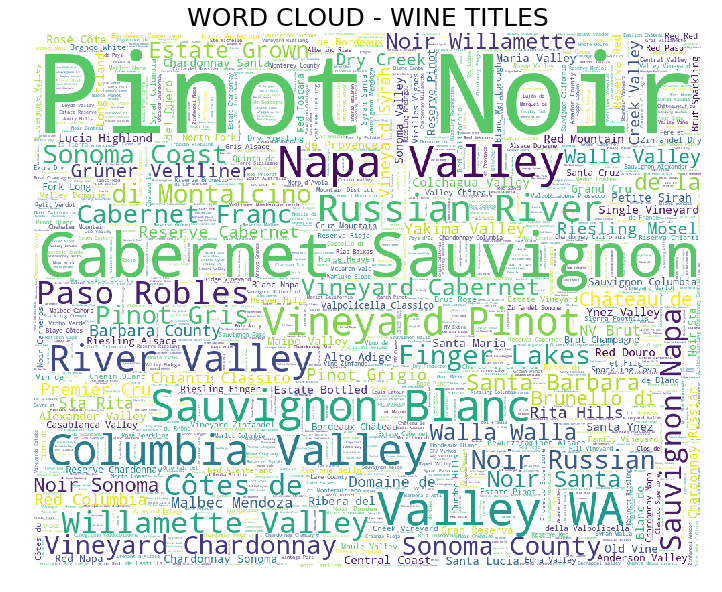

In [39]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wineReviews['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - WINE TITLES",fontsize=25)
plt.axis('off')

plt.show()